## Importing packages

In [1]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cluster' was built under R version 4.1.3"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e107

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

[[32]]
[1] TRUE

[[33]]
[1] TRUE

[[34]]
[1] TRUE

[[35]]
[1] TRUE

[[36]]
[1] TRUE

[[37]]
[1] TRUE

[[38]]
[1] TRUE

[[39]]
[1] TRUE

[[40]]
[1] TRUE

[[41]]
[1] TRUE

In [2]:
dim(df_during_facilitators)

[1] 1214    6

## Clustering - Kmodes Fisher

In [3]:
df_during_facilitators_dist <- distinct(df_during_facilitators)
nrow(df_during_facilitators_dist)

[1] 50

### Caliski

<hr />

#### Scanning parameters

In [4]:
source(here('Modules','modules.R'))
nseed <- 1000
nk <- nrow(distinct(df_during_facilitators))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     calisnki <- c()
#     for (k in 2:nk) {
#         fs <- calisnki_values_kmodes(k, df_during_facilitators_dist, 200, seed)[[1]]
#         calisnki <- append(calisnki, fs)
#     }

#     ks_by_seed[seed, ] <- calisnki
# }

# write.csv(
#     ks_by_seed,
#     "calisnki_kmodes_or_facilitators.csv", row.names = FALSE
# )

#### Results

In [5]:
cal <- read.csv("calisnki_kmodes_or_facilitators.csv")
cal[, ncol(cal)+1] <-  seq.int(nrow(cal))
colnames(cal) <- append(2:nrow(distinct(df_during_facilitators)), "seed")
head(cal)

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
1,91.38462,123.90909,307.94444,411.42857,116.1600,967.5000,216.00000,1491.3750,442.9630,571.35000,...,4.0585366,1.1025641,0.1555471,1.4545455,0.06937669,0.31304348,0.05237316,0.006666667,NA,1
2,154.28571,253.07692,1916.66667,410.62500,397.2571,800.2778,710.00000,285.5357,862.2222,727.35000,...,0.4616300,0.6466667,0.9445438,0.6818182,0.41025641,0.09225875,0.34042553,0.004065041,NA,2
3,57.14286,42.13793,111.51515,99.14062,130.9000,247.7619,1614.00000,526.1667,1342.2222,27.87073,...,5.1512195,0.8800000,0.6920930,0.9440559,0.35555556,0.21391304,0.05189414,0.028846154,NA,3
4,50.00000,48.70290,308.06061,691.87500,2279.2000,791.9167,202.28571,1178.7500,526.6667,284.70000,...,0.2165052,0.2148148,1.3395349,0.1108647,0.05245902,0.36521739,0.06546645,0.001016260,NA,4
5,54.05825,170.37500,475.33333,131.44737,543.4000,637.8333,27.05085,156.3125,537.7778,16.81034,...,2.7317073,0.4133333,0.1837777,0.8181818,0.11377778,0.36521739,0.08510638,0.004065041,NA,5
6,246.40000,648.20833,99.21569,334.68750,1007.6000,1619.6667,1434.00000,28.7500,508.8889,487.50000,...,0.4473528,1.1794872,0.1986598,0.3873967,1.17333333,0.44347826,0.04425532,0.028846154,NA,6


####  Best K and best seed by highest sample mean

In [6]:
print("Best K")
best_K_kmodes <- match(max(apply(cal, 2, mean)[1:(nk-2)]), apply(cal, 2, mean)) + 1
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(cal[, best_K_kmodes-1]), cal[, best_K_kmodes-1])
print(best_seed_kmodes)
print("Calisnki")
print(max(cal[, best_K_kmodes-1]))

[1] "Best K"
[1] 8
[1] "Best Seed"
[1] 679
[1] "Calisnki"
[1] 3180


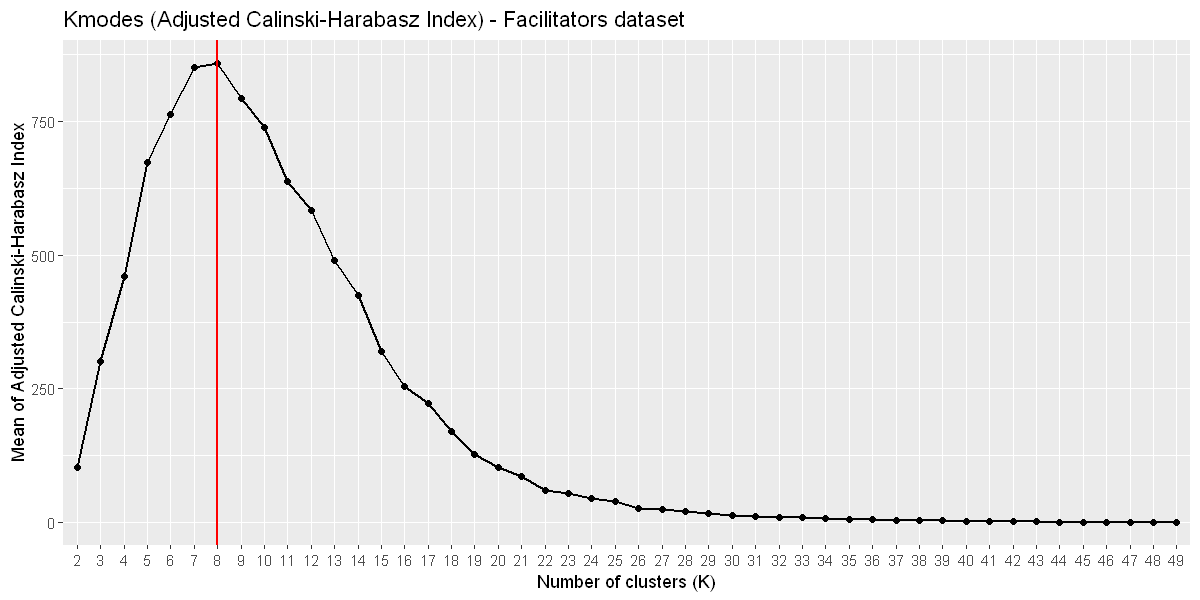

In [11]:
means_df <- data.frame(mean = apply(cal, 2, mean)[1:(nk-2)], k = names(apply(cal, 2, mean)[1:(nk-2)]))
options(repr.plot.width = 10, repr.plot.height =5)
ggplot(data=means_df, aes(x=factor(as.numeric(k)), y=mean, group=1)) +
    geom_line(size=0.7) + geom_point(size=1.5) + 
    geom_vline(xintercept = best_K_kmodes-1, color = "red", size=0.8) + 
    ggtitle("Kmodes (Adjusted Calinski-Harabasz Index) - Facilitators dataset") +
    xlab('Number of clusters (K)') +
    ylab('Mean of Adjusted Calinski-Harabasz Index')


ggsave(path="graphs", file="metric_evolution.jpeg", width = 10, height = 5)

## Exploring Kmodes best k

In [8]:
chosen_kmode <- kmodes_seed(df_during_facilitators_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)
df_during_facilitators_dist$cluster <- chosen_kmode$cluster
head(df_during_facilitators_dist)

,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group,cluster
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,0,0,0,1,0,4
2,0,0,0,0,0,0,4
3,1,1,0,0,1,0,5
4,0,0,0,0,1,1,2
5,0,1,1,0,1,1,1
6,1,0,1,0,1,0,4


In [9]:
joint <- c(
    'PA_easiness_outdoor_activities'='PA_easiness_outdoor_activities',
    'PA_easiness_professional_guidance' = 'PA_easiness_professional_guidance',
    'PA_easiness_music' = 'PA_easiness_music',
    'PA_easiness_others' = 'PA_easiness_others',
    'PA_facilitator_home' = 'PA_facilitator_home',
    'PA_facilitator_group' = 'PA_facilitator_group'
)

df_during_facilitators <- left_join(df_during_facilitators, df_during_facilitators_dist, by = joint)
df_during$cluster <- df_during_facilitators$cluster
df_during_barriers$cluster <- df_during_facilitators$cluster

nrow(df_during_facilitators)

[1] 1214

In [10]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8 
161 342  57 265 153 170  61   5 

### Profile Plots
<hr />

In [ ]:
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
create_cluster_histograms(
    colors = colors, 
    df = df_during, 
    names = names(df_during[, 20:ncol(df_during)-1]),
    best_k = best_K_kmodes
)
create_cluster_histograms(
    colors = colors, 
    df = df_during_barriers, 
    names = names(df_during_barriers[, 1:ncol(df_during_barriers)-1]),
    best_k = best_K_kmodes
)

#### Mode

In [12]:
chosen_kmode$mode

,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,0,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,0
4,1,0,0,0,0,0
5,1,1,0,0,1,0
6,0,1,1,1,1,0
7,1,1,0,0,1,1
8,1,0,1,1,0,0
